### Imports

In [1]:
import numpy as np
import pandas as pd
from stratmanager import StrategyManager

import sklearn.mixture as mix
from ta.momentum import RSIIndicator
import matplotlib.pyplot as plt

### Data Extraction and Returns Overview

In [2]:
# Extract data
start_date = '2018-01-01'
end_date = '2024-01-01'
symbol = "BTC-USD"

strat_mgr = StrategyManager(symbol=symbol, start_date=start_date, end_date=end_date)
df = strat_mgr.df.copy()

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets
Date,,,,,,,,
2018-01-02 00:00:00+00:00,13625.000000,15444.599609,13163.599609,14982.099609,16846600192,0.097011,0.173281,0.096726
2018-01-03 00:00:00+00:00,14978.200195,15572.799805,14844.500000,15201.000000,16871900160,0.014611,0.049062,0.117852
2018-01-04 00:00:00+00:00,15270.700195,15739.700195,14522.200195,15599.200195,21783199744,0.026196,0.083837,0.138163
2018-01-05 00:00:00+00:00,15477.200195,17705.199219,15202.799805,17429.500000,23840899072,0.117333,0.164601,0.274086
2018-01-06 00:00:00+00:00,17462.099609,17712.400391,16764.599609,17527.000000,18314600448,0.005594,0.056536,0.281235


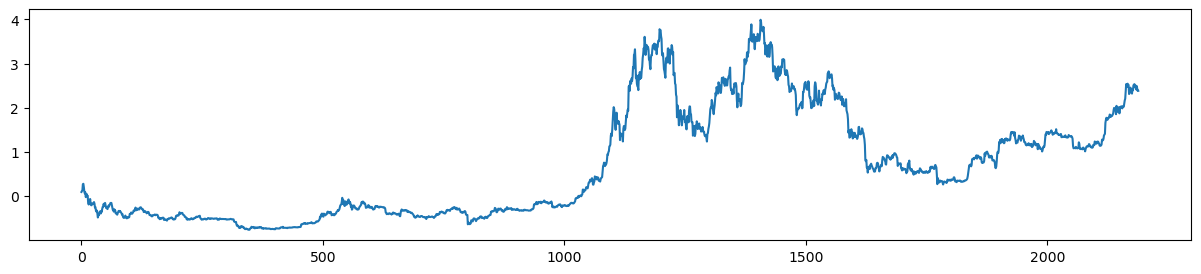

In [5]:
# Benchmark returns profile
fig = plt.figure(figsize=(15, 3))
plt.plot(df['Bench_C_Rets'].values)

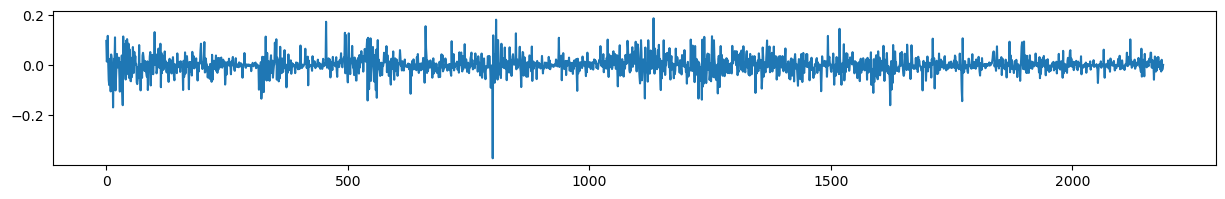

In [ ]:
# Benchmark returns profile 
fig = plt.figure(figsize=(15, 2))
plt.plot(df.Returns.values)

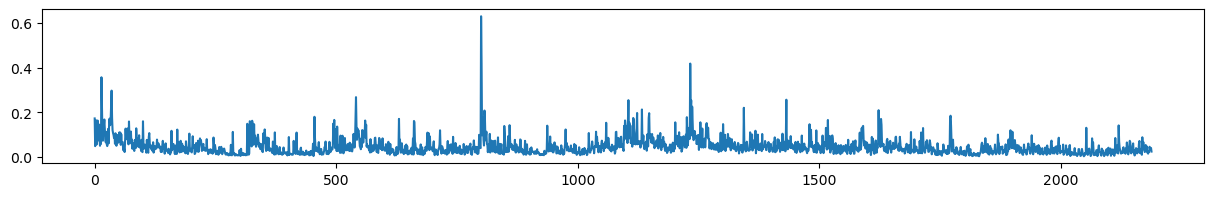

In [7]:
# Benchmark range profile 
fig = plt.figure(figsize=(15, 2))
plt.plot(df.Range.values)

### Feature Engineering - Feature Expansion

In [8]:
# Create a copy
df_fe = df.copy()

##### Indicators

In [9]:
# Add RSI
rsi = RSIIndicator(close=df_fe.Close, window=14).rsi()
df_fe['RSI'] = rsi
df_fe['RSI_Ret'] = df_fe['RSI'] / df_fe['RSI'].shift(1)

In [10]:
# Add Moving Average
df_fe['MA_12'] = df_fe['Close'].rolling(window=12).mean()
df_fe['MA_21'] = df_fe['Close'].rolling(window=21).mean()

In [11]:
# Day of the week
df_fe['DOW'] = df_fe.index.dayofweek

In [12]:
# Rolling cumulative returns
df_fe['Rolling_Rets'] = df_fe['Returns'].rolling(window=30).sum()

In [13]:
# Rolling cumulative range
df_fe['Average_Range'] = df_fe['Range'].rolling(window=30).mean()

##### Time Intervals

In [14]:
# Add time intervals
t_steps = [1, 2]
t_features = ['Returns', 'Range', 'RSI_Ret']

for ts in t_steps:
    for tf in t_features:
        df_fe[f'{tf}_T{ts}'] = df_fe[tf].shift(ts)

In [15]:
# Show dataframe
df_fe.head()

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,MA_21,DOW,Rolling_Rets,Average_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00+00:00,13625.000000,15444.599609,13163.599609,14982.099609,16846600192,0.097011,0.173281,0.096726,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00+00:00,14978.200195,15572.799805,14844.500000,15201.000000,16871900160,0.014611,0.049062,0.117852,NaN,NaN,...,NaN,2,NaN,NaN,0.097011,0.173281,NaN,NaN,NaN,NaN
2018-01-04 00:00:00+00:00,15270.700195,15739.700195,14522.200195,15599.200195,21783199744,0.026196,0.083837,0.138163,NaN,NaN,...,NaN,3,NaN,NaN,0.014611,0.049062,NaN,0.097011,0.173281,NaN
2018-01-05 00:00:00+00:00,15477.200195,17705.199219,15202.799805,17429.500000,23840899072,0.117333,0.164601,0.274086,NaN,NaN,...,NaN,4,NaN,NaN,0.026196,0.083837,NaN,0.014611,0.049062,NaN
2018-01-06 00:00:00+00:00,17462.099609,17712.400391,16764.599609,17527.000000,18314600448,0.005594,0.056536,0.281235,NaN,NaN,...,NaN,5,NaN,NaN,0.117333,0.164601,NaN,0.026196,0.083837,NaN


### Feature Engineering - Feature Scaling

In [ ]:
# Correct for stationarity
df_fs = df_fe.copy()
df_fs[['Open', 'High', 'Low', 'Volume']] = df_fs[['Open', 'High', 'Low', 'Volume']].pct_change()
df_fs.head()

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,MA_21,DOW,Rolling_Rets,Average_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00+00:00,NaN,NaN,NaN,14982.099609,NaN,0.097011,0.173281,0.096726,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00+00:00,0.099317,0.008301,0.127693,15201.000000,0.001502,0.014611,0.049062,0.117852,NaN,NaN,...,NaN,2,NaN,NaN,0.097011,0.173281,NaN,NaN,NaN,NaN
2018-01-04 00:00:00+00:00,0.019528,0.010717,-0.021712,15599.200195,0.291093,0.026196,0.083837,0.138163,NaN,NaN,...,NaN,3,NaN,NaN,0.014611,0.049062,NaN,0.097011,0.173281,NaN
2018-01-05 00:00:00+00:00,0.013523,0.124875,0.046866,17429.500000,0.094463,0.117333,0.164601,0.274086,NaN,NaN,...,NaN,4,NaN,NaN,0.026196,0.083837,NaN,0.014611,0.049062,NaN
2018-01-06 00:00:00+00:00,0.128247,0.000407,0.102731,17527.000000,-0.231799,0.005594,0.056536,0.281235,NaN,NaN,...,NaN,5,NaN,NaN,0.117333,0.164601,NaN,0.026196,0.083837,NaN


### Assess Data for ML Readiness

In [18]:
# Check for NaN
df_fs.isnull().values.any()
df_fs.dropna(inplace=True)

In [19]:
df_fs.isnull().values.any()

False

In [21]:
# Check for infinite values
dfobj = df_fs.isin([np.inf, -np.inf])
count = np.isinf(dfobj).values.sum()
count
# df_fs.replace([np.inf, -np.inf], np.nan, inplace=True)

0

In [22]:
# Check for non-numerical objects
df_fs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2160 entries, 2018-01-31 00:00:00+00:00 to 2023-12-30 00:00:00+00:00
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           2160 non-null   float64
 1   High           2160 non-null   float64
 2   Low            2160 non-null   float64
 3   Close          2160 non-null   float64
 4   Volume         2160 non-null   float64
 5   Returns        2160 non-null   float64
 6   Range          2160 non-null   float64
 7   Bench_C_Rets   2160 non-null   float64
 8   RSI            2160 non-null   float64
 9   RSI_Ret        2160 non-null   float64
 10  MA_12          2160 non-null   float64
 11  MA_21          2160 non-null   float64
 12  DOW            2160 non-null   int32  
 13  Rolling_Rets   2160 non-null   float64
 14  Average_Range  2160 non-null   float64
 15  Returns_T1     2160 non-null   float64
 16  Range_T1       2160 non-null   float64
 17  RSI_

In [23]:
# Describe dataframe 
df_fs.describe()

,Open,High,Low,Close,Volume,Returns,Range,Bench_C_Rets,RSI,RSI_Ret,...,MA_21,DOW,Rolling_Rets,Average_Range,Returns_T1,Range_T1,RSI_Ret_T1,Returns_T2,Range_T2,RSI_Ret_T2
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,...,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,0.001262,0.001106,0.001302,21867.782892,0.036269,0.001311,0.046136,0.689783,51.692149,1.005697,...,21722.523526,3.000926,0.036318,0.046647,0.001262,0.046184,1.005618,0.001248,0.046193,1.005608
std,0.035893,0.031437,0.035430,16084.152171,0.308946,0.035788,0.039010,1.242242,14.162356,0.107782,...,15930.809307,1.999305,0.209679,0.021499,0.035862,0.039046,0.107843,0.035872,0.039047,0.107850
min,-0.365924,-0.263712,-0.364062,3236.761719,-0.869188,-0.371695,0.003596,-0.758082,9.920239,0.453659,...,3531.719052,0.000000,-0.844981,0.015756,-0.371695,0.003596,0.453659,-0.371695,0.003596,0.453659
25%,-0.013772,-0.011259,-0.010798,8268.754639,-0.127000,-0.013877,0.021913,-0.386019,42.000248,0.954048,...,8306.421154,1.000000,-0.094084,0.032545,-0.013900,0.021913,0.954026,-0.013974,0.021913,0.954026
50%,0.000519,-0.000800,0.002286,17219.956055,-0.008225,0.000773,0.036520,0.367680,50.483824,1.002551,...,17100.240234,3.000000,0.023400,0.041700,0.000755,0.036527,1.002502,0.000755,0.036527,1.002502
75%,0.016136,0.012710,0.014461,32722.024902,0.147505,0.016137,0.057335,1.497962,60.919471,1.047154,...,32987.266113,5.000000,0.177148,0.054849,0.016137,0.057424,1.047154,0.016137,0.057464,1.047154
max,0.187677,0.187159,0.247892,67566.828125,5.439003,0.187465,0.631387,3.989745,90.719434,1.926078,...,63016.876488,6.000000,0.818827,0.133239,0.187465,0.631387,1.926078,0.187465,0.631387,1.926078


### Save Data

In [24]:
# Save dataframe
df_fs.to_csv(f'data/{symbol}.csv')